<a href="https://colab.research.google.com/github/murpunk/Programming_2023/blob/main/15_05_23_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Прочитайте и повторите примеры из книги *Андреас Мюллер, Сара Гвидо. Введение в машинное обучение с помощью Python. Руководство для специалистов по работе с данными* со страниц 295-320.


Пример: попытка построить модель, предсказывающую, кликнет пользователь на ссылку или нет. Нам известно, что он кликает только в 1% случаев из 100. Выборка получается несбалансированная по объёму примеров.

## 1. Пример с цифрами

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
digits = load_digits()

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
y = digits.target == 9

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

Для начала можно использовать классификатор DummyClassifier, который всегда предсказывает класс не девятки, то есть тот класс, где большинство чисел. Получим 90% точность без какого-либо обучения.

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(f"Уникальные спрогнозированные метки: {np.unique(pred_most_frequent)}")
print(f"Правильность на тестовом наборе: {round(dummy_majority.score(X_test, y_test), 2)}")

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.9


Можно для сравнения использовать реальный классификатор. Но и он даёт предсказание не с лучшей точностью. Тогда, возможно, точность не является оптимальной оценкой.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"Правильность на тестовом наборе: {round(tree.score(X_test, y_test), 2)}")

Правильность на тестовом наборе: 0.92


Можно ещё взять классификатор на основе логистической регрессии и сравнить его с результатами DummyClassifier.

In [ ]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f"Правильность dummy: {round(dummy.score(X_test, y_test), 2)}")
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"Правильность logreg: {round(logreg.score(X_test, y_test), 2)}")

Правильность dummy: 0.9
Правильность logreg: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Для несбалансированных наборов данных правильность не является адекватной метрикой, поэтому лучше использовать другие метрики для оценки качества бинарной классификации. Например, матрицу ошибок.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print(f"Матрица ошибок: \n{confusion}")

Матрица ошибок: 
[[402   1]
 [  6  41]]


**Интерпретация матрицы ошибок**:


402 — правильно отнесённые к отрицательным (TN)


6 — положительные, которые были неверно отнесены к отрицательным (FN)


41 — правильно отнесённые к положительным (TP)


1 — отрицательные, неверно отнесённые  положительным (FP)



---



---



Если взять матрицы ошибок у этих четырёх моделей, то можно сравнить их результаты.

In [ ]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\nЛогистическая регрессия:")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

Dummy-модель:
[[403   0]
 [ 47   0]]

Дерево решений:
[[390  13]
 [ 24  23]]

Логистическая регрессия:
[[402   1]
 [  6  41]]


## Метрики

**Правильность**: $\frac{TP + TN}{TP + TN + FP + FN}$


То есть количество верно классифицированных примеров на общее количество примеров.

**Точность** (precision): $\frac{TP}{TP + FP}$


Сколько из предсказанных положительных примеров оказались действительно положительными. Точность важна, когда необходимо снизить количество ложноположительных примеров.


Эта метрика ещё называется как **прогностическая ценность положительного результата** (PPV).

**Полнота** (recall): $\frac{TP}{TP + FN}$

Полнота показывает, сколько от числа фактических положительных примеров было предсказано как положительный класс.

Метрика полноты важна, если нужно сократить количество ложноотрицательных примеров.

Другие названия: **чувствительность** (sensitivity), **процент результативных ответов**, **хит-рейт**, **доля истинно положительных примеров** (true positive rate, TPR).

F-мера (F-measure): $2 \times \frac{точность \times полнота}{точность + полнота}$

Это гармоническое среднее точности и полноты. Оно ещё называется $f_1-мера$.

In [ ]:
from sklearn.metrics import f1_score
print(f"f1-мера наибольшей частоты: {round(f1_score(y_test, pred_most_frequent), 2)}")
print(f"f1-мера дамми: {round(f1_score(y_test, pred_dummy), 2)}")
print(f"f1-мера дерева: {round(f1_score(y_test, pred_tree), 2)}")
print(f"f1-мера логистической регрессии: {round(f1_score(y_test, pred_logreg), 2)}")

f1-мера наибольшей частоты: 0.0
f1-мера дамми: 0.0
f1-мера дерева: 0.55
f1-мера логистической регрессии: 0.92


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["не 9", "9"]))

              precision    recall  f1-score   support

        не 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Развёрнутый отчёт для DummyClassifier:

In [ ]:
print(classification_report(y_test, pred_dummy, target_names=["не 9", "9"]))

              precision    recall  f1-score   support

        не 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Развёрнутый отчёт для логистической регрессии:

In [ ]:
print(classification_report(y_test, pred_logreg, target_names=["не 9", "9"]))

              precision    recall  f1-score   support

        не 9       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



## 2. Пример с точками

Всего 450 примеров, где 400 точек находятся в отрицательном классе, 50 точек — в положительном.

In [ ]:
from sklearn.svm import SVC

In [ ]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 13.7 MB/s eta 0:00:00


In [ ]:
import mglearn

In [ ]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples = (400, 50), cluster_std=[7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma=.05).fit(X_train, y_train)

Тепловая карта решающей функции и влияние изменения порогового значения на результат.

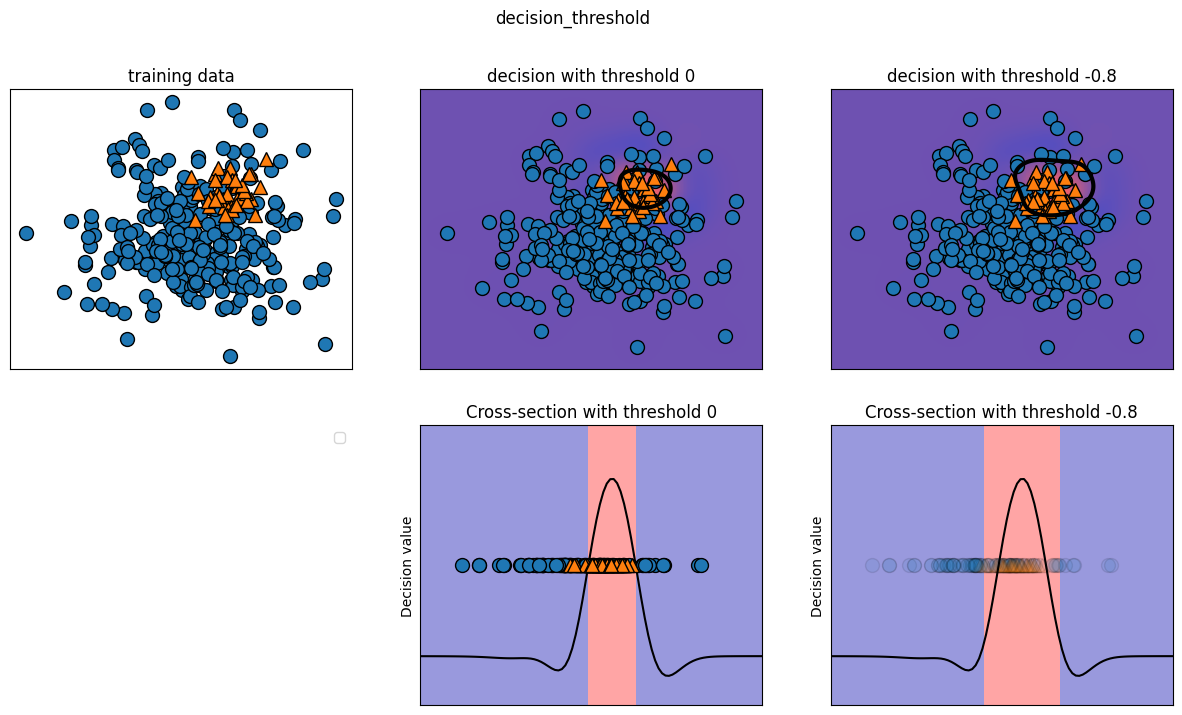

In [ ]:
mglearn.plots.plot_decision_threshold()

Можно в отчёте увидеть результаты метрик при снижении порогового значения.

In [ ]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [ ]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



## 3. Кривая точности-полноты

Кривая точности-полноты позволяет посмотреть на все значения полноты и точности для пороговых значений.

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

Тут можно увидеть список значений точности и полноты для всех пороговых значений.

In [ ]:
import matplotlib.pyplot as plt


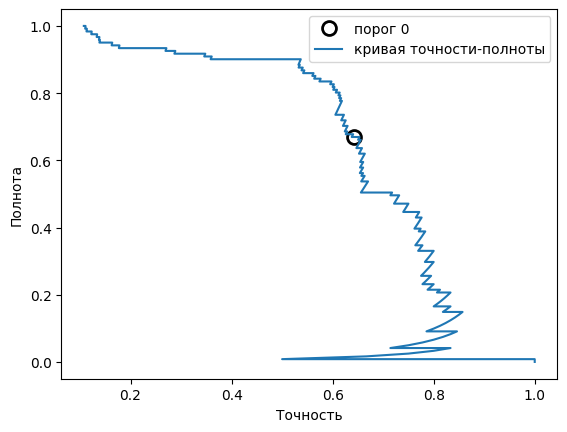

In [ ]:
# используется большой объём данных, чтобы сгладить кривую
X, y = make_blobs(n_samples=[4000, 500], cluster_std=[7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], "o", markersize = 10, label = "порог 0", fillstyle = "none", c = "k", mew=2)

plt.plot(precision, recall, label = "кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")

Классификаторы могут давать хорошее качество на разных участках кривой. Ниже дано сравнение SVM с методом случайного леса.


Для крайних пороговых значений случайный лес даёт лучшее качество, чем метод опорных векторов. А для центральной части SVM работает лучше.

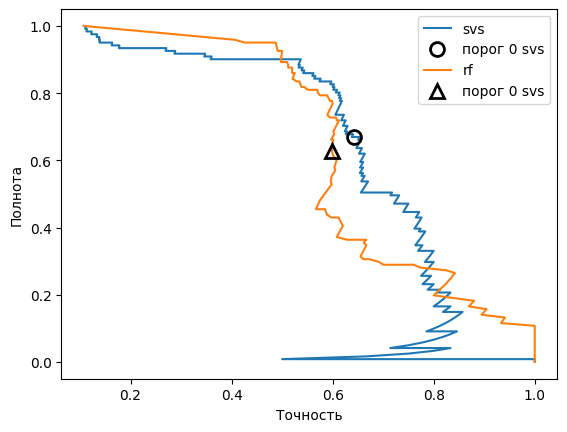

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(precision, recall, label="svs")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="порог 0 svs", fillstyle="none", c="k", mew=2)

plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label="порог 0 svs", fillstyle="none", c="k", mew=2)

plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")


In [ ]:
print("f1-мера для случайного леса: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1-мера для метода опорных векторов: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1-мера для случайного леса: 0.610
f1-мера для метода опорных векторов: 0.656


Можно использовать среднюю точность, это вычисление интеграла под кривой точности-полноты.

In [ ]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print(f"Средняя точность Rundom Forest: {round(ap_rf, 3)}")
print(f"Средняя точность SVC: {round(ap_svc, 3)}")

Средняя точность Rundom Forest: 0.66
Средняя точность SVC: 0.666


## 4.  ROC-кривая

**Кривая рабочей характеристики приёмника** (receiver operating characterictics curve), или **ROC-кривая**, позволяет рассмотреть все пороговые значения для классификатора, но вместо точности и полноты она показывает долю ложно положительных примеров (false pasitive rate, FPR) в сравнении с долей истинно положительных примеров (true positive rate, TPR).

ROC-кривая для SVM:

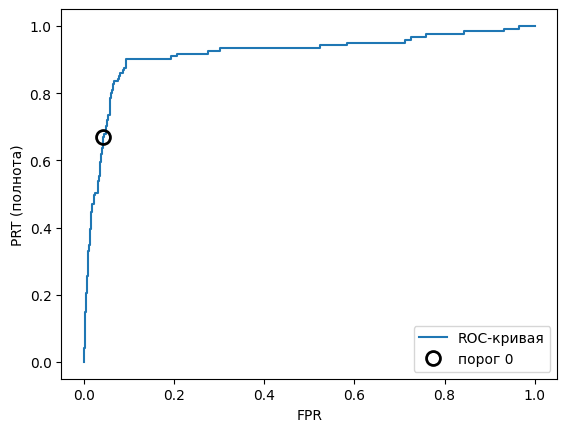

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label = 'ROC-кривая')
plt.xlabel("FPR")
plt.ylabel("PRT (полнота)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize = 10, label = "порог 0", fillstyle = "none", c="k", mew=2)
plt.legend(loc=4)

Хороший классификатор проходит через левый верхний угол, давая высокое значение полноты при низкой доле FP.



---



---



Сравнение ROC-кривых для SVM и случайного леса

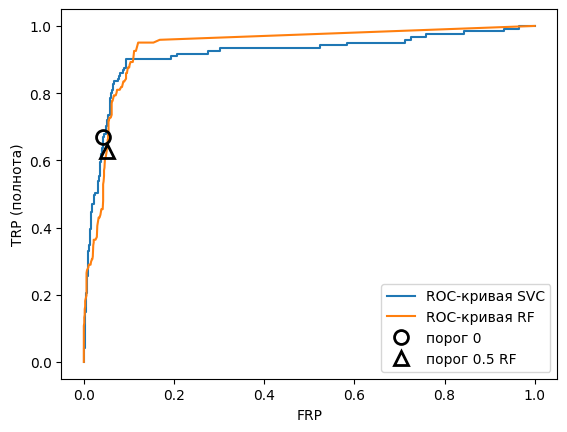

In [ ]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label = "ROC-кривая SVC")
plt.plot(fpr_rf, tpr_rf, label = "ROC-кривая RF")

plt.xlabel("FRP")
plt.ylabel("TRP (полнота)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize = 10, label = "порог 0", fillstyle = "none", c="k", mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], "^", markersize = 10, label = "порог 0.5 RF", fillstyle = "none", c="k", mew=2)
plt.legend(loc=4)

Можно подытожить оценку, вычислив площади под кривой.

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print(f"AUC для случайного леса: {round(rf_auc, 3)}")
print(f"AUC для SVC: {round(svc_auc, 3)}")

AUC для случайного леса: 0.937
AUC для SVC: 0.916


AUC даёт лучшее качество модели, чем SVC. Независимо от того, как сбалансированы классы, метрика AUC является более оптимальной, чем правильности при решении задач с несбалансированной выборкой.



---


Вернёмся в решению задачи по определению девятки в цифрах.

Классифицируем решение, используя SVM с тремя различными настройками ширины ядра и gamma.

gamma = 1.00 правильность = 0.90 AUC = 0.50
gamma = 0.05 правильность = 0.90 AUC = 1.00
gamma = 0.01 правильность = 0.90 AUC = 1.00


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


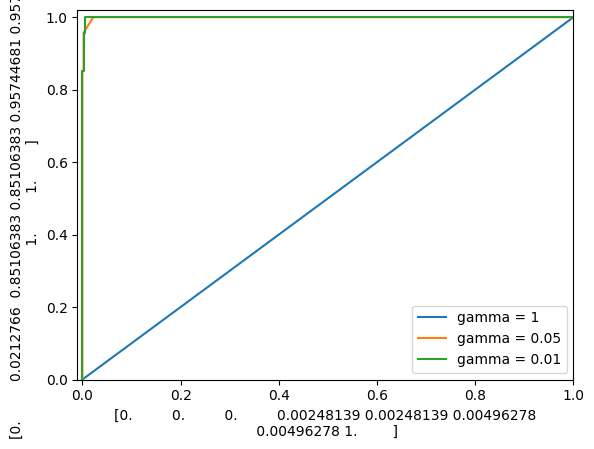

In [ ]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
  svc = SVC(gamma=gamma).fit(X_train, y_train)
  accuracy = svc.score(X_test, y_test)
  auc = roc_auc_score(y_test, svc.decision_function(X_test))
  fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
  print("gamma = {:.2f} правильность = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
  plt.plot(fpr,tpr, label = f"gamma = {round(gamma, 3)}")
plt.xlabel(fpr)
plt.ylabel(tpr)
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

Вывод:
при разных пороговых значениях AUC может быть разным. В данном примере AUC стал равным единице при gamma = 0.01. При gamma = 0.5 AUC стал равен значению случайного классификатора.

# II. Выполнить задание из файла statement-metrics

### 1. Загрузите файл classification.csv

В нём записаны истинные классы объектов выборки (колонка true) и ответы некоторого классификатора (колонка predicted).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Программирование/classification.csv")
df.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


### 2. Заполните таблицу ошибок классификации

In [10]:
TP = 0
FP = 0
FN = 0
TN = 0
for i in range(len(df)):
    if df["true"][i] == 1 and df["pred"][i] == 1: TP += 1
    if df["true"][i] == 0 and df["pred"][i] == 0: TN += 1
    if df["true"][i] == 0 and df["pred"][i] == 1: FP += 1
    if df["true"][i] == 1 and df["pred"][i] == 0: FN += 1

print(f"True positive: {TP},false positive: {FP},false negative: {FN}, true negative: {TN}.")

True positive: 43,false positive: 34,false negative: 59, true negative: 64.


### 3.  Посчитайте основные метрики качества классификатора

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

 Accuracy (доля верно угаданных) — sklearn.metrics.accuracy

In [18]:
print(f'Accuracy: {accuracy_score(df["true"], df["pred"])}.')

Accuracy: 0.535.


 Precision (точность) — sklearn.metrics.accuracy.precision_score

In [25]:
print(f'Precision: {round(precision_score(df["true"], df["pred"]), 3)}.')

Precision: 0.558.


Recall (полнота) — sklearn.metrics.recall_score


In [27]:
print(f'Recall: {round(recall_score(df["true"], df["pred"]), 3)}.')

Recall: 0.422.


F-мера — sklearn.metrics.f1_score


In [28]:
print(f'F-мера: {round(f1_score(df["true"], df["pred"]), 3)}.')

F-мера: 0.48.


### 4. Имеется четыре обученных классификатора

В файле scores.csv записаны истинные классы и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке:


* для логистической регрессии — вероятность положительного
класса (колонка score_logreg),
* для SVM — отступ от разделяющей поверхности (колонка score_svm),
* для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
* для решающего дерева — доля положительных объектов в листе (колонка score_tree).